In [1]:
import pandapower as pp 
import pandapower.plotting as plot
import numpy as np
import pandas as pd
import math
import json
import matplotlib.pyplot as plt
import os
import pandapower.networks as nw
import random


In [2]:
net = nw.pp.create_empty_network() #create an empty net

In [3]:
# Loading the nodes, created in the NetworkX file: XNetwork_grid

# all nodes
nodes_orig = pd.read_csv('network_data/nodes_with_im.csv')
nodes_orig['NodeID'] = nodes_orig['NodeID'].astype(str) 

# subnetwork connection nodes
sub_con_nodes = pd.read_csv('network_data/sub_con_nodes.csv')
sub_con_nodes['NodeID'] = sub_con_nodes['NodeID'].astype(str) 

# subnetwork nodes
subnet_nodes = pd.read_csv('network_data/subnet_nodes.csv')
subnet_nodes['NodeID'] = subnet_nodes['NodeID'].astype(str) 

frames = [nodes_orig,sub_con_nodes,subnet_nodes] 
nodes_complet = pd.concat(frames)

#open island grids to assign a bus with a rated voltage (in each island is the same voltage level)

with open('network_data/grid_island.json') as json_data:
    grid_islands = json.load(json_data)
    
# island grid with 2 is the 21 kV mid grid
grid_mid_21 = pd.DataFrame.from_dict(grid_islands['2'])
grid_mid_21 = grid_mid_21.rename(columns = {0:'NodeID'}) 
# island grid with 2 is the 10 kV mid grid
grid_mid_10 = pd.DataFrame.from_dict(grid_islands['4'])
grid_mid_10 = grid_mid_10.rename(columns = {0:'NodeID'}) 

grid_mid_21['r_voltage'] = 21.0
grid_mid_10['r_voltage'] = 10.6
grid_mid = pd.concat([grid_mid_10,grid_mid_21])

grid_low = nodes_complet[~nodes_complet['NodeID'].isin(grid_mid['NodeID'])]
grid_low['r_voltage'] = 0.42
grid_low = grid_low[['NodeID', 'r_voltage']]

frames = [grid_mid, grid_low]
grid_nodes = pd.concat(frames)

grid_nodes = pd.merge(grid_nodes, nodes_complet, on = 'NodeID', how='inner')

grid_nodes.loc[2503]

NodeID       52933802
r_voltage        0.42
CoordX         554116
CoordY         145774
Name: 2503, dtype: object

In [4]:
### Deleting the spotload and photovoltaic nodes, since they do not physical exist and 
### their connection lines has zero length

node_spotload = grid_nodes[grid_nodes['NodeID'].str.contains('SPOTLOAD')] # not needed
node_pv = grid_nodes[grid_nodes['NodeID'].str.contains('PHOTO')] # not needed
grid_nodes = grid_nodes[~grid_nodes['NodeID'].str.contains('SPOTLOAD')]
grid_nodes = grid_nodes[~grid_nodes['NodeID'].str.contains('PHOTO')]

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(grid_nodes)
grid_nodes

,NodeID,r_voltage,CoordX,CoordY
0,42885650,10.60,554436.0,146391.0
1,42882928,10.60,554436.0,146391.0
2,42882783,10.60,554436.0,146391.0
3,52034695,10.60,554436.0,146391.0
4,42885533,10.60,554436.0,146391.0
5,42882924,10.60,554436.0,146391.0
6,42878167,10.60,554436.0,146391.0
7,42964447,10.60,554436.0,146391.0
8,42882919,10.60,554436.0,146391.0
9,42881300,10.60,554436.0,146391.0


In [5]:
### Nodes/busses creation

for i, row in grid_nodes.iterrows():
    pp.create_bus(net, name=row.NodeID, vn_kv=row.r_voltage, geodata = (row.CoordX,row.CoordY))

In [6]:
net.bus
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(net.bus)

,name,vn_kv,type,zone,in_service
0,42885650,10.60,b,None,True
1,42882928,10.60,b,None,True
2,42882783,10.60,b,None,True
3,52034695,10.60,b,None,True
4,42885533,10.60,b,None,True
5,42882924,10.60,b,None,True
6,42878167,10.60,b,None,True
7,42964447,10.60,b,None,True
8,42882919,10.60,b,None,True
9,42881300,10.60,b,None,True


In [7]:
### Loading the section csv for the lines

section = pd.read_csv('network_data/result_section_better.csv', header=0)

section = section[['SectionID', 'FromNodeID', 'ToNodeID']]
section['FromNodeID'] = section['FromNodeID'].astype(int)

#section

In [8]:
### Loading the information: cable from equipment.txt and underground settings from Network.txt (Romand Energy)
### Combining them to cable
cable = pd.read_csv('network_data/cable.csv')
ug_cable = pd.read_csv('network_data/ug_cable_network.csv', header=0)

ug_cable = ug_cable.rename(index=str, columns={"LineCableID":"ID"})

ug_cable = ug_cable[["ID","SectionID", "Length"]].copy()
cable= cable.merge(ug_cable, on='ID')

cable

,ID,R1,R0,X1,X0,B1,B0,Amps,Amps_1,Amps_2,...,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,SectionID,Length
0,B-G-2X95,0.2049,1.0,0.040,1.0,421.30,1.0,440.0,440.0,440.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43852184,49.0
1,B-T-95+N,0.0000,0.0,0.000,0.0,0.00,0.0,1.0,1.0,1.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43824608,60.0
2,B-TDC-6-RE,3.5639,0.0,0.100,0.0,345.58,0.0,50.0,50.0,50.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,44023328,2.0
3,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826761,10.0
4,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43827341,23.0
5,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826091,1.0
6,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826021,42.0
7,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43826391,31.0
8,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43825941,38.0
9,B-X-150-AL,0.2633,0.0,0.078,0.0,230.36,0.0,290.0,290.0,290.0,...,0,1,-1.0,-274.0,NaN,0,0,NaN,43825961,40.0


In [9]:
### Transformer input, connecting with the node voltage informations 
### transformer from equipment.txt 
### transformer settings from network.txt

transformer = pd.read_csv('network_data/transformer.csv')

transformer_settings = pd.read_csv('network_data/transformer_settings.csv')

transformer_settings = transformer_settings.rename(index=str, columns={"ID": "EqID"})

transformer = transformer.merge(transformer_settings, 'outer', 'EqID')

transformer_orig = transformer.dropna(subset=['SectionID'])


transformer = transformer_orig[["SectionID" , "KVA", "KVLLprim", "KVLLsec","Z1", 'XR','MaxBoost', "NoLoadLosses"]].copy()



### standard transformer on this voltage level seems to have all identical parameters for the following
transformer['shift_degree'] = 150
transformer['tp_side'] = 'hv'
transformer['tp_mid'] = 0
transformer['tp_min'] = -2
transformer['tp_max'] = 2
transformer['tp_st_percent'] = 2.5
transformer['tp_st_degree'] = 0

### The calculation of the real component of short circuit voltage [%] is not clear for me,
### two approches that I found leads to different results:
### Approch 1 ###
#### V_scr (in%) = abs(Z) = sqrt(X^2+R^2);
#### Note that Z, X, and R are the impedance, inductance and resistance in p.u.
#transformer['v_scr'] = abs(transformer['Z1']) # 
### Approch 2 ### 
#R_sq = (transformer['Z1']**2) /(1+(transformer['XR']**2)).astype(float)
#transformer['v_scr'] = R_sq**(1/2)

#### Open loop losses represents the shunt (magnetization) branch in the electrical model of transformers.
########## If you have no data about it you could put i_0 = 0; It means you neglected this branch which is a practical assumption.
transformer['i_0'] = 0 # open loop losses [%] missing/zero is assumed

#### Maximum loading of a transformer with respect to its rated power is the maximum power that a transformer 
########## could transfer it for a short period of time without damages.
########## If you have no data for this, you could assume maximum loading power is 20-30% higher than the rated power (very approximative assumption).
transformer['max_loading'] = 'NaN' # maximum loading of the trafo with respect to rated
                                   # apparent power and its corresponding current at 1 p.u. 
                                   # It is not a required parameter for a power flow run

#### noloadlosses =~ iron losses : pfe_kw
transformer= transformer.rename(columns = {'NoLoadLosses':'pfe_kw'})

#### short circuit voltage: for 20/0.4 and 10/0.4 (according to the standard types)
transformer.loc[transformer['KVLLprim'] == 10.6, 'v_sc'] = 4
transformer.loc[transformer['KVLLprim'] == 21.0, 'v_sc'] = 6
#### short circuit voltage for 20/10 transformer unknown yet and not in use
# transformer.loc[transformer['KVLLsec'] == 10.6, 'v_sc'] = dunno yet


transformer[["SectionID"]] = transformer[["SectionID"]].astype(int)
transformer[["SectionID"]] = transformer[["SectionID"]].astype(str)



#transformer = transformer[transformer['KVA'] < 10000.0] # the 10/21 kV transformers are taken out of consideration,
# since the 10kV grid has not been identified (by me)
transformer

,SectionID,KVA,KVLLprim,KVLLsec,Z1,XR,MaxBoost,pfe_kw,shift_degree,tp_side,tp_mid,tp_min,tp_max,tp_st_percent,tp_st_degree,i_0,max_loading,v_sc
0,42547360,400.0,10.6,0.42,3.81,3.674,5.13,0.680,150,hv,0,-2,2,2.5,0,0,NaN,4.0
1,42571987,630.0,10.6,0.42,4.28,6.224,4.76,0.627,150,hv,0,-2,2,2.5,0,0,NaN,4.0
2,42590298,400.0,10.6,0.42,3.83,3.688,5.13,0.678,150,hv,0,-2,2,2.5,0,0,NaN,4.0
3,42552624,100.0,10.6,0.42,4.20,2.221,2.50,0.342,150,hv,0,-2,2,2.5,0,0,NaN,4.0
4,42574167,630.0,21.0,0.42,4.28,6.327,4.76,0.594,150,hv,0,-2,2,2.5,0,0,NaN,6.0
5,214551743,630.0,21.0,0.42,4.21,7.020,4.76,0.612,150,hv,0,-2,2,2.5,0,0,NaN,6.0
6,42595956,10000.0,21.0,10.60,8.63,13.698,10.00,9.300,150,hv,0,-2,2,2.5,0,0,NaN,6.0
7,42613835,630.0,21.0,0.42,4.26,6.157,4.76,0.624,150,hv,0,-2,2,2.5,0,0,NaN,6.0
8,42571862,630.0,10.6,0.42,4.29,6.210,4.76,0.630,150,hv,0,-2,2,2.5,0,0,NaN,4.0
9,42574494,630.0,21.0,0.42,4.10,5.904,4.76,0.642,150,hv,0,-2,2,2.5,0,0,NaN,6.0


In [10]:
transformer_imagine = transformer[transformer['KVLLsec'] == 10.6].reset_index()
transformer_imagine.at[0,'SectionID']='52034627'
transformer_imagine.at[1,'SectionID']='43958419'
transformer_imagine.at[2,'SectionID']='43961213'
transformer = transformer.append(transformer_imagine).reset_index(drop=True)
transformer

,KVA,KVLLprim,KVLLsec,MaxBoost,SectionID,XR,Z1,i_0,index,max_loading,pfe_kw,shift_degree,tp_max,tp_mid,tp_min,tp_side,tp_st_degree,tp_st_percent,v_sc
0,400.0,10.6,0.42,5.13,42547360,3.674,3.81,0,NaN,NaN,0.680,150,2,0,-2,hv,0,2.5,4.0
1,630.0,10.6,0.42,4.76,42571987,6.224,4.28,0,NaN,NaN,0.627,150,2,0,-2,hv,0,2.5,4.0
2,400.0,10.6,0.42,5.13,42590298,3.688,3.83,0,NaN,NaN,0.678,150,2,0,-2,hv,0,2.5,4.0
3,100.0,10.6,0.42,2.50,42552624,2.221,4.20,0,NaN,NaN,0.342,150,2,0,-2,hv,0,2.5,4.0
4,630.0,21.0,0.42,4.76,42574167,6.327,4.28,0,NaN,NaN,0.594,150,2,0,-2,hv,0,2.5,6.0
5,630.0,21.0,0.42,4.76,214551743,7.020,4.21,0,NaN,NaN,0.612,150,2,0,-2,hv,0,2.5,6.0
6,10000.0,21.0,10.60,10.00,42595956,13.698,8.63,0,NaN,NaN,9.300,150,2,0,-2,hv,0,2.5,6.0
7,630.0,21.0,0.42,4.76,42613835,6.157,4.26,0,NaN,NaN,0.624,150,2,0,-2,hv,0,2.5,6.0
8,630.0,10.6,0.42,4.76,42571862,6.210,4.29,0,NaN,NaN,0.630,150,2,0,-2,hv,0,2.5,4.0
9,630.0,21.0,0.42,4.76,42574494,5.904,4.10,0,NaN,NaN,0.642,150,2,0,-2,hv,0,2.5,6.0


In [11]:
transformer = pd.merge(transformer, section, on='SectionID', how='inner')
#transformer
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(section)

                              SectionID  FromNodeID  \
0                              42571222    42901266   
1                              42533575    42890834   
2                              43939209    42787380   
3                              43825506    42698357   
4                              43971553    42703621   
5                              94588448    52857530   
6                     42783662-SPOTLOAD    42783662   
7                              43895417    52889602   
8                              42533570    42890835   
9                              43906026    42785340   
10                             43939204    42660293   
11                    42787380-SPOTLOAD    42787380   
12                             93849829    93848443   
13                             43884803    42686073   
14                             42571224    42901268   
15                    42769314-SPOTLOAD    42769314   
16                             52107522    42890831   
17        

In [12]:
### Rearrangement of the transformer information, to identify the high voltage node and the low voltage node

grid_nodes_2 = grid_nodes[['NodeID','r_voltage']]
grid_nodes_2 = grid_nodes_2.rename(columns={'NodeID':'FromNodeID','r_voltage':'from_r_voltage'})

transformer['FromNodeID'] = transformer['FromNodeID'].astype(str)
grid_nodes_2['FromNodeID'] = grid_nodes_2['FromNodeID'].astype(str)
transformer = pd.merge(transformer, grid_nodes_2, on='FromNodeID', how='inner')

### Where no merge was done, the "from Node" has to be a "to Node"
grid_nodes_3 = grid_nodes_2.rename(columns={'FromNodeID':'ToNodeID','from_r_voltage':'to_r_voltage'})
transformer = pd.merge(transformer, grid_nodes_3, on='ToNodeID', how='inner')

transformer
### Transformers are not declared in an uniform way, rearrange as: Prim = From, sec = To

,KVA,KVLLprim,KVLLsec,MaxBoost,SectionID,XR,Z1,i_0,index,max_loading,...,tp_mid,tp_min,tp_side,tp_st_degree,tp_st_percent,v_sc,FromNodeID,ToNodeID,from_r_voltage,to_r_voltage
0,400.0,10.6,0.42,5.13,42547360,3.674,3.81,0,NaN,NaN,...,0,-2,hv,0,2.5,4.0,42934975,42934976,0.42,21.00
1,630.0,10.6,0.42,4.76,42571987,6.224,4.28,0,NaN,NaN,...,0,-2,hv,0,2.5,4.0,42883121,42905802,0.42,21.00
2,400.0,10.6,0.42,5.13,42590298,3.688,3.83,0,NaN,NaN,...,0,-2,hv,0,2.5,4.0,42932969,42980182,0.42,21.00
3,100.0,10.6,0.42,2.50,42552624,2.221,4.20,0,NaN,NaN,...,0,-2,hv,0,2.5,4.0,42882930,42878165,0.42,10.60
4,630.0,21.0,0.42,4.76,42574167,6.327,4.28,0,NaN,NaN,...,0,-2,hv,0,2.5,6.0,42902143,42902140,0.42,21.00
5,630.0,21.0,0.42,4.76,214551743,7.020,4.21,0,NaN,NaN,...,0,-2,hv,0,2.5,6.0,214550146,105470910,0.42,21.00
6,10000.0,21.0,10.60,10.00,42595956,13.698,8.63,0,NaN,NaN,...,0,-2,hv,0,2.5,6.0,42941227,42882789,21.00,10.60
7,630.0,21.0,0.42,4.76,42613835,6.157,4.26,0,NaN,NaN,...,0,-2,hv,0,2.5,6.0,42951838,42951839,21.00,0.42
8,630.0,10.6,0.42,4.76,42571862,6.210,4.29,0,NaN,NaN,...,0,-2,hv,0,2.5,4.0,42891069,42891068,21.00,0.42
9,630.0,21.0,0.42,4.76,42574494,5.904,4.10,0,NaN,NaN,...,0,-2,hv,0,2.5,6.0,42881441,42945679,0.42,21.00


In [13]:
### Transformer site with 21 kV is always a "from node" and are therefore correct
transformer_prim_from = transformer[transformer['from_r_voltage'] == 21.00]
### Transformer site with 0.4 kV is alwayse a "to node"  and therefore correct
transformer_sec_to = transformer[transformer['to_r_voltage'] == 0.42]
### Transformer with 21 kV as "to node" side need to be rearranged, since it is always a "from node"
transformer_21_sec = transformer[transformer['to_r_voltage'] == 21.00]
transformer_21_sec = transformer_21_sec.rename(columns = {'from_r_voltage':'to_r_voltage', 'to_r_voltage':'from_r_voltage',
                                                         'FromNodeID':'ToNodeID','ToNodeID':'FromNodeID'})
### Transformer with 0.4 kV as "from node" need to be rearranged
transformer_04_prim = transformer[transformer['from_r_voltage'] == 0.42]
transformer_04_prim = transformer_04_prim.rename(columns = {'from_r_voltage':'to_r_voltage', 'to_r_voltage':'from_r_voltage',
                                                           'FromNodeID':'ToNodeID','ToNodeID':'FromNodeID'})
 

### Rearrangement of transformers where 21 kV is a "to node" :
### from node:0.42 kV, to node:21kV ---> from node:21 kV, to node:0.42 kV
#transformer_rearrange = transformer[~transformer['SectionID'].isin(transformer_prim_from['SectionID'])]
#transformer_rearrange = transformer_rearrange.rename(columns={'FromNodeID':'ToNodeID', 'ToNodeID':'FromNodeID',
#                                                              'from_r_voltage':'to_r_voltage', 'to_r_voltage':'from_r_voltage',})

frames = [transformer_sec_to, transformer_prim_from,transformer_21_sec,transformer_04_prim]
transformer = pd.concat(frames).drop_duplicates().reset_index(drop=True)

transformer 

,FromNodeID,KVA,KVLLprim,KVLLsec,MaxBoost,SectionID,ToNodeID,XR,Z1,from_r_voltage,...,pfe_kw,shift_degree,to_r_voltage,tp_max,tp_mid,tp_min,tp_side,tp_st_degree,tp_st_percent,v_sc
0,42951838,630.0,21.0,0.42,4.76,42613835,42951839,6.157,4.26,21.0,...,0.624,150,0.42,2,0,-2,hv,0,2.5,6.0
1,42891069,630.0,10.6,0.42,4.76,42571862,42891068,6.210,4.29,21.0,...,0.630,150,0.42,2,0,-2,hv,0,2.5,4.0
2,88865776,1000.0,21.0,0.42,4.76,90147807,89563419,8.669,5.79,21.0,...,0.790,150,0.42,2,0,-2,hv,0,2.5,6.0
3,42894295,1000.0,10.6,0.42,4.76,42546221,42966104,9.385,6.03,21.0,...,0.767,150,0.42,2,0,-2,hv,0,2.5,4.0
4,42891762,630.0,10.6,0.42,4.76,42554475,42905803,6.235,4.29,21.0,...,0.630,150,0.42,2,0,-2,hv,0,2.5,4.0
5,42910701,630.0,10.6,0.42,4.76,42576832,42910585,6.353,4.19,21.0,...,0.598,150,0.42,2,0,-2,hv,0,2.5,4.0
6,42935046,400.0,10.6,0.42,4.76,214659777,109996361,5.291,4.25,21.0,...,0.459,150,0.42,2,0,-2,hv,0,2.5,4.0
7,42984903,630.0,21.0,0.42,4.76,42609997,42951136,5.944,3.94,21.0,...,0.670,150,0.42,2,0,-2,hv,0,2.5,6.0
8,192652303,1000.0,21.0,0.42,4.76,42548089,175586744,8.044,6.06,21.0,...,0.791,150,0.42,2,0,-2,hv,0,2.5,6.0
9,42951143,630.0,21.0,0.42,4.76,42566172,42883602,5.475,3.94,21.0,...,0.684,150,0.42,2,0,-2,hv,0,2.5,6.0


In [14]:
### Only considering the section, with mid voltage given in dataframe grid and are not a transformer section

section = section[~section['SectionID'].isin(transformer['SectionID'])].reset_index()
section = section.applymap(str)
section = section[['SectionID','FromNodeID', 'ToNodeID']]
section = section.drop_duplicates(subset="SectionID")

### Creating the spotload sections 
section_spotload = section[section['SectionID'].str.contains('SPOTLOAD')].reset_index()
section = section[~section['SectionID'].str.contains('SPOTLOAD')]

### Creating the pv sections
section_pv = section[section['SectionID'].str.contains('PHOTOV')].reset_index()
section = section[~section['SectionID'].str.contains('PHOTOVO')]

#section_spotload



In [15]:
### Combining information of cable (created with cable and underground settings) with sections
### Giving each node connection physical parameters 

cable['SectionID'] = cable['SectionID'].astype(str)
section['SectionID'] = section['SectionID'].astype(str) 

cable_section = pd.merge(section, cable, on='SectionID', how='inner')

cable_section.drop_duplicates(subset="SectionID").reset_index()

#cable_section

,index,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length
0,0,42571222,42901266,42901267,B-FIC,0.4158,1.00,0.3269,1.000,3.544,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
1,1,42533575,42890834,42890827,B-FIC,0.4158,1.00,0.3269,1.000,3.544,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
2,2,43939209,42787380,42687308,B-GKN-K-16,1.4662,0.00,0.0900,0.000,137.500,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,7.0
3,3,43825506,42698357,42684664,B-P-50+25,0.4476,0.00,0.0900,0.000,282.740,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,18.0
4,4,43971553,42703621,42694044,B-XN-150-AL,0.2633,0.00,0.0780,0.000,230.360,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,238.0
5,5,94588448,52857530,94588294,B-GKN-K-150 AL+95,0.2450,1.00,0.0710,1.000,1.000,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,34.0
6,6,43895417,52889602,42697592,B-T-95,0.2238,0.00,0.0820,0.000,706.680,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,3.0
7,7,42533570,42890835,42890827,B-FIC,0.4158,1.00,0.3269,1.000,3.544,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,0.0
8,8,43906026,42785340,42692978,B-P-25+16,0.8409,0.00,0.0940,0.000,259.180,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,4.0
9,9,43939204,42660293,42793224,B-P-5,4.7100,0.00,0.1200,0.000,123.700,...,28.0,0,1,-1.0,-274.0,NaN,0,0,NaN,11.0


In [16]:
### Testing if all sections have been assigned with a cable (should be empty)
cable_section['SectionID'] = cable_section['SectionID'].astype(str)
section['SectionID'] = section['SectionID'].astype(str)

cable_section_test = cable_section[~cable_section['SectionID'].isin(section['SectionID'])]

cable_section_test

,SectionID,FromNodeID,ToNodeID,ID,R1,R0,X1,X0,B1,B0,...,OverallDiameter,ConcentricNeutralBeforeSheath,UserDefinedImpedances,Frequency,Temperature,ImpedancesNote,Favorite,Flags,Comments,Length


In [17]:
### Some sections has zero lenth or/and zero impedance and will be created as switches 

cable_section_low_imp = cable_section[cable_section['X1'] < 0.005]
cable_section_zero_length =  cable_section[cable_section['Length'] < 0.05]

# Deleting the special cases from the line/cable section
cable_section = cable_section[cable_section['X1'] >= 0.005]
cable_section = cable_section[cable_section['Length'] >= 0.05]



In [18]:
#cable_section_low_imp

In [19]:
#cable_section_zero_length


In [20]:
cable_section = cable_section[[
 'SectionID',
 'FromNodeID',
 'ToNodeID',
 'ID',
 'R1',
 'R0',
 'X1',
 'X0',
 'B1',
 'B0',
 'Amps',
 'Amps_1',
 'Amps_2',
 'Amps_3',
 'Amps_4',
 'Length']]
#cable_section

In [21]:
### To plot the network, pandapower needs coordinates of their sections:
#### creating two columns (X,Y) with the coordinates of the FromNodeID
nodes_from = nodes_complet.rename(columns = {'NodeID':'FromNodeID'}) 
cable_section_from = pd.merge(cable_section, nodes_from, on='FromNodeID', how='inner')
cable_section_from = cable_section_from.rename(columns = {'CoordX':'FromCoordX', 'CoordY':'FromCoordY'})
############
#### creating two columns (X,Y) with the coordinates of the ToNodeID
nodes_to = nodes_complet.rename(columns = {'NodeID':'ToNodeID'}) 
cable_section_coord = pd.merge(cable_section_from, nodes_to, on='ToNodeID', how='inner')
cable_section_coord = cable_section_coord.rename(columns = {'CoordX':'ToCoordX', 'CoordY':'ToCoordY'})

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(cable_section_coord)

In [22]:
# creating the lines, without low impedance and length cable

for _, hv_line in cable_section_coord.iterrows():
        from_bus = pp.get_element_index(net, "bus", hv_line.FromNodeID)
        to_bus = pp.get_element_index(net, "bus", hv_line.ToNodeID)
        coord = ([(hv_line.FromCoordX, hv_line.FromCoordY),(hv_line.ToCoordX,hv_line.ToCoordY)])
        pp.create_line_from_parameters(net, from_bus, to_bus, length_km=hv_line.Length/1000,
                                       r_ohm_per_km = hv_line.R1, x_ohm_per_km = hv_line.X1, 
                                       c_nf_per_km = 1000/(hv_line.B1 *math.pi*2*50) ,
                                       max_i_ka = hv_line.Amps_4/1000, name=hv_line.SectionID , parallel=1,
                                       type = "cs", geodata = coord, df = 1 )

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(net.line)

In [23]:
 
net.line # 978
net.line_geodata

,coords
0,"[(554020.475, 146396.927), (554025.194, 146400..."
1,"[(554018.517, 146409.068), (554025.194, 146400..."
2,"[(554031.871, 146392.063), (554025.194, 146400..."
3,"[(554007.887, 146422.604), (554003.163, 146428..."
4,"[(553992.0, 146424.0), (554003.163, 146428.620..."
5,"[(554016.16, 146347.766), (553866.93, 146402.2..."
6,"[(553864.373767, 146409.474934), (553866.93, 1..."
7,"[(554109.3811090001, 146311.74646199998), (554..."
8,"[(553992.0, 146424.0), (554003.818, 146421.31)]"
9,"[(554025.1070000001, 146394.201), (554003.818,..."


In [24]:
net.line_geodata['coords'][0]

[(554020.475, 146396.927), (554025.194, 146400.566)]

In [25]:
# Bus-bus switches

for _, switch_line in cable_section_zero_length.iterrows():
    from_bus = pp.get_element_index(net, "bus", switch_line.FromNodeID)
    to_bus = pp.get_element_index(net, "bus", switch_line.ToNodeID)
    pp.create_switch(net, from_bus, to_bus, et='b', closed=True, name=switch_line.SectionID)
    
for _, switch_line in cable_section_low_imp.iterrows():
    from_bus = pp.get_element_index(net, "bus", switch_line.FromNodeID)
    to_bus = pp.get_element_index(net, "bus", switch_line.ToNodeID)
    pp.create_switch(net, from_bus, to_bus, et='b', closed=True, name=switch_line.SectionID)



In [26]:
net.switch
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(net.switch)

       bus  element et  type  closed       name
0     2503     2502  b  None    True   42571222
1     3018     1922  b  None    True   42533575
2     3019     1922  b  None    True   42533570
3     2512     1922  b  None    True   93849829
4     3020     2503  b  None    True   42571224
5     3023     2503  b  None    True   42571223
6     3021     1922  b  None    True   42533571
7     3024     2503  b  None    True   42571225
8     1922     2507  b  None    True   93849824
9     3026     1922  b  None    True   42533572
10    3027     1922  b  None    True   42533569
11    3028     2503  b  None    True   42571226
12    3025     1922  b  None    True   42533574
13    3030     1922  b  None    True   42533573
14    3033     2503  b  None    True   42571227
15     283      204  b  None    True   42575388
16     332      113  b  None    True   42549833
17     458      485  b  None    True   42613833
18     122      189  b  None    True   42535653
19     394      158  b  None    True   4

In [27]:
transformer

,FromNodeID,KVA,KVLLprim,KVLLsec,MaxBoost,SectionID,ToNodeID,XR,Z1,from_r_voltage,...,pfe_kw,shift_degree,to_r_voltage,tp_max,tp_mid,tp_min,tp_side,tp_st_degree,tp_st_percent,v_sc
0,42951838,630.0,21.0,0.42,4.76,42613835,42951839,6.157,4.26,21.0,...,0.624,150,0.42,2,0,-2,hv,0,2.5,6.0
1,42891069,630.0,10.6,0.42,4.76,42571862,42891068,6.210,4.29,21.0,...,0.630,150,0.42,2,0,-2,hv,0,2.5,4.0
2,88865776,1000.0,21.0,0.42,4.76,90147807,89563419,8.669,5.79,21.0,...,0.790,150,0.42,2,0,-2,hv,0,2.5,6.0
3,42894295,1000.0,10.6,0.42,4.76,42546221,42966104,9.385,6.03,21.0,...,0.767,150,0.42,2,0,-2,hv,0,2.5,4.0
4,42891762,630.0,10.6,0.42,4.76,42554475,42905803,6.235,4.29,21.0,...,0.630,150,0.42,2,0,-2,hv,0,2.5,4.0
5,42910701,630.0,10.6,0.42,4.76,42576832,42910585,6.353,4.19,21.0,...,0.598,150,0.42,2,0,-2,hv,0,2.5,4.0
6,42935046,400.0,10.6,0.42,4.76,214659777,109996361,5.291,4.25,21.0,...,0.459,150,0.42,2,0,-2,hv,0,2.5,4.0
7,42984903,630.0,21.0,0.42,4.76,42609997,42951136,5.944,3.94,21.0,...,0.670,150,0.42,2,0,-2,hv,0,2.5,6.0
8,192652303,1000.0,21.0,0.42,4.76,42548089,175586744,8.044,6.06,21.0,...,0.791,150,0.42,2,0,-2,hv,0,2.5,6.0
9,42951143,630.0,21.0,0.42,4.76,42566172,42883602,5.475,3.94,21.0,...,0.684,150,0.42,2,0,-2,hv,0,2.5,6.0


In [28]:
trafotypes = []
for _, trafo in transformer.iterrows():
    trafotyp = {'trafo_' + str(trafo.SectionID):{'sn_kva': trafo.KVA,'vn_hv_kv': trafo.KVLLprim,
                                'vn_lv_kv': trafo.KVLLsec,
                                'vsc_percent': trafo.v_sc,'vscr_percent':1.3 ,'pfe_kw':trafo.pfe_kw ,
                                'i0_percent':0 ,'shift_degree': 150, 'tp_side': 'hv',
                                 'tp_mid':0 ,'tp_min':-2 ,'tp_max':2 ,'tp_st_percent':2.5,'tp_st_degree':0,
                                 'tp_pos': 0,'parallel':1, 'df':1 }}
    pp.create_std_types(net, data=trafotyp, element="trafo")


In [29]:
### Liberay for the transformers
## Either I create them (1) or I directly use the parameters from the transformer table (2), currently I prefer the second approach, so this block is commented

trafotypes = {"0.1 MVA 10/0.4 kV":{'sn_kva': 100,'vn_hv_kv': 10.6, 'vn_lv_kv': 0.4, 'vsc_percent': 6,
                                 'vscr_percent':1.46 ,'pfe_kw':0.342 ,'i0_percent':0 ,'shift_degree': 150, 'tp_side': 'hv',
                                 'tp_mid':0 ,'tp_min':-2 ,'tp_max':2 ,'tp_st_percent':2.5,'tp_st_degree':0,
                                 'tp_pos': 0,'parallel':1, 'df':1 },
              "1 MVA 10/0.4 kV": {'sn_kva': 1000,'vn_hv_kv': 20, 'vn_lv_kv': 0.4, 'vsc_percent': 6,
                                 'vscr_percent': 1.25 ,'pfe_kw': 6,'i0_percent': 0,'shift_degree': 150, 'tp_side': 'hv',
                                 'tp_mid':0 ,'tp_min':-2 ,'tp_max':2 ,'tp_st_percent':2.5,'tp_st_degree':0,
                                 'tp_pos': 0,'parallel':1, 'df':1  } ,
              "1 MVA 20/0.4 kV": {'sn_kva': 1000,'vn_hv_kv': 20, 'vn_lv_kv': 0.4, 'vsc_percent': 6,
                                 'vscr_percent': 1.15 ,'pfe_kw': 6,'i0_percent': 0,'shift_degree': 150, 'tp_side': 'hv',
                                 'tp_mid':0 ,'tp_min':-2 ,'tp_max':2 ,'tp_st_percent':2.5,'tp_st_degree':0,
                                 'tp_pos': 0,'parallel':1, 'df':1  } ,
              "10 MVA 20/10 kV": {'sn_kva': 10000,'vn_hv_kv': 20,'vn_lv_kv': 10, 'vsc_percent': 6,
                                 'vscr_percent': 1.05, 'pfe_kw': 8.9,'i0_percent':0 ,'shift_degree':150,'tp_side': 'hv',
                                 'tp_mid': 0,'tp_min':-2 ,'tp_max': 2,'tp_st_percent':2.5 ,'tp_st_degree':0,
                                 'tp_pos': 0,'parallel':1, 'df':1 }
             }
pp.create_std_types(net, data=trafotypes, element="trafo")

In [30]:
# combining the standard types libary with the trafos, based on the information I have
transformer_100KVA = transformer[transformer['KVA'] == 100]
transformer_100KVA['std_type'] = '0.1 MVA 10/0.4 kV'

transformer_400KVA = transformer[transformer['KVA'] == 400]
transformer_400KVA_prim_21 = transformer_400KVA[transformer_400KVA['from_r_voltage'] == 21.0]
transformer_400KVA_prim_21['std_type'] = '0.4 MVA 20/0.4 kV'

transformer_400KVA_prim_10 = transformer_400KVA[transformer_400KVA['from_r_voltage'] == 10.6]
transformer_400KVA_prim_10['std_type'] = '0.4 MVA 10/0.4 kV'

transformer_630KVA = transformer[transformer['KVA'] == 630.0]
transformer_630KVA_prim_21 = transformer_630KVA[transformer_630KVA['from_r_voltage'] == 21.0]
transformer_630KVA_prim_21['std_type'] = '0.63 MVA 20/0.4 kV'

transformer_630KVA_prim_10 = transformer_630KVA[transformer_630KVA['from_r_voltage'] == 10.6]
transformer_630KVA_prim_10['std_type'] = '0.63 MVA 10/0.4 kV'

transformer_1000KVA = transformer[transformer['KVA'] == 1000.0]
transformer_1000KVA_prim_21 = transformer_1000KVA[transformer_1000KVA['from_r_voltage'] == 21.0]
transformer_1000KVA_prim_21['std_type'] = '0.63 MVA 20/0.4 kV' #################'1 MVA 20/0.4 kV' # doesnt exist

transformer_1000KVA_prim_10 = transformer_1000KVA[transformer_1000KVA['from_r_voltage'] == 10.6]
transformer_1000KVA_prim_10['std_type'] = '1 MVA 10/0.4 kV' # doesnt exist

transformer_10000KVA = transformer[transformer['KVA'] == 10000.0]
transformer_10000KVA_prim_21 = transformer_10000KVA[transformer_10000KVA['from_r_voltage'] == 21.0]
transformer_10000KVA_prim_21['std_type'] = '10 MVA 20/10 kV' # doesnt exist

frames = [transformer_100KVA, 
          transformer_400KVA_prim_21,
          transformer_400KVA_prim_10, 
          transformer_630KVA_prim_21,
          transformer_630KVA_prim_10,
          transformer_1000KVA_prim_21,
          transformer_1000KVA_prim_10,
          transformer_10000KVA_prim_21]
          
transformer = pd.concat(frames).reset_index(drop=True)
transformer

,FromNodeID,KVA,KVLLprim,KVLLsec,MaxBoost,SectionID,ToNodeID,XR,Z1,from_r_voltage,...,shift_degree,to_r_voltage,tp_max,tp_mid,tp_min,tp_side,tp_st_degree,tp_st_percent,v_sc,std_type
0,42878165,100.0,10.6,0.42,2.50,42552624,42882930,2.221,4.20,10.6,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.1 MVA 10/0.4 kV
1,42935046,400.0,10.6,0.42,4.76,214659777,109996361,5.291,4.25,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV
2,42934976,400.0,10.6,0.42,5.13,42547360,42934975,3.674,3.81,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV
3,42980182,400.0,10.6,0.42,5.13,42590298,42932969,3.688,3.83,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV
4,42922950,400.0,10.6,0.42,4.76,42569691,42889202,5.405,4.17,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV
5,42958199,400.0,21.0,0.42,4.76,42601525,42980919,5.244,4.19,21.0,...,150,0.42,2,0,-2,hv,0,2.5,6.0,0.4 MVA 20/0.4 kV
6,42952074,400.0,21.0,0.42,4.76,42601480,42951513,5.262,4.20,21.0,...,150,0.42,2,0,-2,hv,0,2.5,6.0,0.4 MVA 20/0.4 kV
7,42878136,400.0,10.6,0.42,4.76,42570236,42888040,5.186,4.40,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV
8,42923227,400.0,21.0,0.42,4.76,42574811,42886748,5.390,4.27,21.0,...,150,0.42,2,0,-2,hv,0,2.5,6.0,0.4 MVA 20/0.4 kV
9,42894409,400.0,10.6,0.42,5.13,42576786,42894411,3.902,4.50,21.0,...,150,0.42,2,0,-2,hv,0,2.5,4.0,0.4 MVA 20/0.4 kV


In [31]:
### trafos with basic libary

for _, trafo in transformer.iterrows():
    hv_bus = pp.get_element_index(net, "bus", trafo.FromNodeID)
    lv_bus = pp.get_element_index(net, "bus", trafo.ToNodeID)
    pp.create_transformer(net, hv_bus, lv_bus, std_type=trafo.std_type , name='Trafo '+trafo.SectionID, in_service=True) # 
#'trafo_' + str(trafo.SectionID)

In [32]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_kva,vn_hv_kv,vn_lv_kv,vsc_percent,vscr_percent,pfe_kw,...,tp_side,tp_mid,tp_min,tp_max,tp_st_percent,tp_st_degree,tp_pos,parallel,df,in_service
0,Trafo 42552624,0.1 MVA 10/0.4 kV,57,3540,100.0,10.6,0.4,6.0,1.460,0.342,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
1,Trafo 214659777,0.4 MVA 20/0.4 kV,266,2736,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
2,Trafo 42547360,0.4 MVA 20/0.4 kV,108,3231,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
3,Trafo 42590298,0.4 MVA 20/0.4 kV,341,2726,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
4,Trafo 42569691,0.4 MVA 20/0.4 kV,183,2658,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
5,Trafo 42601525,0.4 MVA 20/0.4 kV,375,3038,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
6,Trafo 42601480,0.4 MVA 20/0.4 kV,450,3263,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
7,Trafo 42570236,0.4 MVA 20/0.4 kV,285,2729,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
8,Trafo 42574811,0.4 MVA 20/0.4 kV,438,2522,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True
9,Trafo 42576786,0.4 MVA 20/0.4 kV,166,3189,400.0,20.0,0.4,6.0,1.425,1.350,...,hv,0,-2,2,2.5,0.0,0,1,1.0,True


In [33]:
############################ LOAD Profils generation start ###############################
##########################################################################################
#### Profil from: Linda Pedersen: Load Modelling of Buildings in Mixed Energy  ###########
#### Distribution Systems ################################################################
##########################################################################################

household_load = pd.read_csv('network_data/household_load.csv')
household_load = household_load[:24].astype(float)

office_load = pd.read_csv('network_data/office.csv')
office_load = office_load[:24].astype(float)

hospital_load = pd.read_csv('network_data/hospital.csv')
hospital_load = hospital_load[:24].astype(float)

hotel_load = pd.read_csv('network_data/hotel.csv')
hotel_load = hotel_load[:24].astype(float)

education_load = pd.read_csv('network_data/education.csv')
education_load = education_load[:24].astype(float)

In [34]:
### The demand files are nominalized towards the mean value of each building
### In the pdh thesis only the max value is given. So I recreated the mean value of each building and afterwards the
### original demand. Each buidling typ will be divided by the household load of each hour
### to nominalize each of them towards the household demand 

max_value_household_WD = 10.5 # [in W/m2] at hour 21  (--> index 20)
max_STD_WD = 1.7
max_factor_household_WD = float(household_load['Winter'][20])
max_STD_factor_WD = float(household_load['Winter STD'][20])
mean_household_WD = max_value_household_WD/max_factor_household_WD
STD_mean_WD = max_STD_WD/max_STD_factor_WD

max_value_household_WE = 10.3 # at hour 20 (--> index 19)
max_STD_WE = 2.1
max_factor_household_WE = float(household_load['Winter.1'][19])
max_STD_factor_WE = float(household_load['Winter STD.1'][19])
mean_household_WE = max_value_household_WE/max_factor_household_WE
STD_mean_WE = max_STD_WE/max_STD_factor_WE

In [35]:
### household used as basic value

household_load_v2 = pd.concat([household_load['Hour'],
                               household_load.iloc[:,1:4] * mean_household_WD,
                               household_load.iloc[:,4:7] * STD_mean_WD ,
                               household_load.iloc[:,7:10] * mean_household_WE,
                               household_load.iloc[:,10:] * STD_mean_WE
                              ],
                              axis=1)
household_load_v2['Winter STD'] = household_load_v2['Winter STD']/household_load_v2['Winter']
household_load_v2['Spring/fall STD'] = household_load_v2['Spring/fall STD']/household_load_v2['Spring/fall']
household_load_v2['Summer STD'] = household_load_v2['Summer STD']/household_load_v2['Summer']
household_load_v2['Winter STD.1'] = household_load_v2['Winter STD.1']/household_load_v2['Winter.1']
household_load_v2['Spring/fall STD.1'] = household_load_v2['Spring/fall STD.1']/household_load_v2['Spring/fall.1']
household_load_v2['Summer STD.1'] = household_load_v2['Summer STD.1']/household_load_v2['Summer.1']
#household_load_v2

In [36]:
### Office demand

max_value_WD = 23.8 # [in W/m2] at hour 12  (--> index 11)
max_STD_WD = 3.2
max_factor_WD = float(office_load['Winter'][11])
max_STD_factor_WD = float(office_load['Winter STD'][11])
mean_WD = max_value_WD/max_factor_WD
STD_mean_WD = max_STD_WD/max_STD_factor_WD

max_value_WE = 13 # at hour 17 (--> index 16)
max_STD_WE = 1.9
max_factor_WE = float(office_load['Winter.1'][16])
max_STD_factor_WE = float(office_load['Winter STD.1'][16])
mean_WE = max_value_WE/max_factor_WE
STD_mean_WE = max_STD_WE/max_STD_factor_WE

In [37]:
office_load_v2 = pd.concat([office_load['Hour'],
                               office_load.iloc[:,1:4] * mean_WD,
                               office_load.iloc[:,4:7] * STD_mean_WD ,
                               office_load.iloc[:,7:10] * mean_WE,
                               office_load.iloc[:,10:] * STD_mean_WE
                              ],
                              axis=1)
#office_load_v2

In [38]:
load_v2 = office_load_v2
office_load_hh = pd.concat([load_v2['Hour'],
                            load_v2['Winter'] / household_load_v2['Winter'],  # normalized toward household
                            load_v2['Spring/fall'] / household_load_v2['Spring/fall'],
                            load_v2['Summer'] / household_load_v2['Summer'],
                            load_v2['Winter STD'] / household_load_v2['Winter'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD'] / household_load_v2['Spring/fall'],
                            load_v2['Summer STD'] / household_load_v2['Summer'],
                            load_v2['Winter.1'] / household_load_v2['Winter.1'],  # normalized toward household
                            load_v2['Spring/fall.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer.1'] / household_load_v2['Summer.1'],
                            load_v2['Winter STD.1'] / household_load_v2['Winter.1'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer STD.1'] / household_load_v2['Summer.1']
                            ],
                            axis=1)

office_load_hh = office_load_hh.rename(columns={0:'Winter_STD', 1:'Spring/fall_STD',2:'Summer_STD',
                                                      3:'Winter_WE_STD',4:'Spring/fall_WE_STD', 5:'Summer_WE_STD'})


In [39]:
### Hospital
max_value_WD = 23.1 # [in W/m2] at hour 13 (--> index 12)
max_STD_WD = 1.6
max_factor_WD = float(hospital_load['Winter'][12])
max_STD_factor_WD = float(hospital_load['Winter STD'][12])
mean_WD = max_value_WD/max_factor_WD
STD_mean_WD = max_STD_WD/max_STD_factor_WD

max_value_WE = 20.2 # at hour 13 (--> index 12)
max_STD_WE = 1.4
max_factor_WE = float(hospital_load['Winter.1'][12])
max_STD_factor_WE = float(hospital_load['Winter STD.1'][12])
mean_WE = max_value_WE/max_factor_WE
STD_mean_WE = max_STD_WE/max_STD_factor_WE

In [40]:
hospital_load_v2 = pd.concat([hospital_load['Hour'],
                               hospital_load.iloc[:,1:4] * mean_WD,
                               hospital_load.iloc[:,4:7] * STD_mean_WD ,
                               hospital_load.iloc[:,7:10] * mean_WE,
                               hospital_load.iloc[:,10:] * STD_mean_WE
                              ],
                              axis=1)
#hospital_load_v2

In [41]:
load_v2 = hospital_load_v2
hospital_load_hh = pd.concat([load_v2['Hour'],
                            load_v2['Winter'] / household_load_v2['Winter'],  # normalized toward household
                            load_v2['Spring/fall'] / household_load_v2['Spring/fall'],
                            load_v2['Summer'] / household_load_v2['Summer'],
                            load_v2['Winter STD'] / household_load_v2['Winter'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD'] / household_load_v2['Spring/fall'],
                            load_v2['Summer STD'] / household_load_v2['Summer'],
                            load_v2['Winter.1'] / household_load_v2['Winter.1'],  # normalized toward household
                            load_v2['Spring/fall.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer.1'] / household_load_v2['Summer.1'],
                            load_v2['Winter STD.1'] / household_load_v2['Winter.1'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer STD.1'] / household_load_v2['Summer.1']
                            ],
                            axis=1)

hospital_load_hh = hospital_load_hh.rename(columns={0:'Winter_STD', 1:'Spring/fall_STD',2:'Summer_STD',
                                                      3:'Winter_WE_STD',4:'Spring/fall_WE_STD', 5:'Summer_WE_STD'})

In [42]:
### Hotel
max_value_WD = 16.3 # [in W/m2] at hour 9  (--> index 8)
max_STD_WD = 2.3
max_factor_WD = float(hotel_load['Winter'][8])
max_STD_factor_WD = float(hotel_load['Winter STD'][8])
mean_WD = max_value_WD/max_factor_WD
STD_mean_WD = max_STD_WD/max_STD_factor_WD

max_value_WE = 15.9 # at hour 10 (--> index 9)
max_STD_WE = 2.7
max_factor_WE = float(hotel_load['Winter.1'][9])
max_STD_factor_WE = float(hotel_load['Winter STD.1'][9])
mean_WE = max_value_WE/max_factor_WE
STD_mean_WE = max_STD_WE/max_STD_factor_WE

In [43]:
hotel_load_v2 = pd.concat([hotel_load['Hour'],
                               hotel_load.iloc[:,1:4] * mean_WD,
                               hotel_load.iloc[:,4:7] * STD_mean_WD ,
                               hotel_load.iloc[:,7:10] * mean_WE,
                               hotel_load.iloc[:,10:] * STD_mean_WE
                              ],
                              axis=1)
#hotel_load_v2

In [44]:
load_v2 = hotel_load_v2
hotel_load_hh = pd.concat([load_v2['Hour'],
                            load_v2['Winter'] / household_load_v2['Winter'],  # normalized toward household
                            load_v2['Spring/fall'] / household_load_v2['Spring/fall'],
                            load_v2['Summer'] / household_load_v2['Summer'],
                            load_v2['Winter STD'] / household_load_v2['Winter'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD'] / household_load_v2['Spring/fall'],
                            load_v2['Summer STD'] / household_load_v2['Summer'],
                            load_v2['Winter.1'] / household_load_v2['Winter.1'],  # normalized toward household
                            load_v2['Spring/fall.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer.1'] / household_load_v2['Summer.1'],
                            load_v2['Winter STD.1'] / household_load_v2['Winter.1'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer STD.1'] / household_load_v2['Summer.1']
                            ],
                            axis=1)
hotel_load_hh= hotel_load_hh.rename(columns={0:'Winter_STD', 1:'Spring/fall_STD',2:'Summer_STD',
                                                      3:'Winter_WE_STD',4:'Spring/fall_WE_STD', 5:'Summer_WE_STD'})

In [45]:
### Education
max_value_WD = 19.6 # [in W/m2] at hour 11  (--> index 10)
max_STD_WD = 5.9
max_factor_WD = float(education_load['Winter'][10])
max_STD_factor_WD = float(education_load['Winter STD'][10])
mean_WD = max_value_WD/max_factor_WD
STD_mean_WD = max_STD_WD/max_STD_factor_WD

max_value_WE = 6.3 # at hour 18 (--> index 17)
max_STD_WE = 2.9
max_factor_WE = float(education_load['Winter.1'][17])
max_STD_factor_WE = float(education_load['Winter STD.1'][17])
mean_WE = max_value_WE/max_factor_WE
STD_mean_WE = max_STD_WE/max_STD_factor_WE

In [46]:
education_load_v2 = pd.concat([education_load['Hour'],
                               education_load.iloc[:,1:4] * mean_WD,
                               education_load.iloc[:,4:7] * STD_mean_WD ,
                               education_load.iloc[:,7:10] * mean_WE,
                               education_load.iloc[:,10:] * STD_mean_WE
                              ],
                              axis=1)
#education_load_v2

In [47]:
load_v2 = education_load_v2
education_load_hh = pd.concat([load_v2['Hour'],
                            load_v2['Winter'] / household_load_v2['Winter'],  # normalized toward household
                            load_v2['Spring/fall'] / household_load_v2['Spring/fall'],
                            load_v2['Summer'] / household_load_v2['Summer'],
                            load_v2['Winter STD'] / household_load_v2['Winter'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD'] / household_load_v2['Spring/fall'],
                            load_v2['Summer STD'] / household_load_v2['Summer'],
                            load_v2['Winter.1'] / household_load_v2['Winter.1'],  # normalized toward household
                            load_v2['Spring/fall.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer.1'] / household_load_v2['Summer.1'],
                            load_v2['Winter STD.1'] / household_load_v2['Winter.1'],  # keeping ratio of STD and value 
                            load_v2['Spring/fall STD.1'] / household_load_v2['Spring/fall.1'],
                            load_v2['Summer STD.1'] / household_load_v2['Summer.1']
                            ],
                            axis=1)

education_load_hh = education_load_hh.rename(columns={0:'Winter_STD', 1:'Spring/fall_STD',2:'Summer_STD',
                                                      3:'Winter_WE_STD',4:'Spring/fall_WE_STD', 5:'Summer_WE_STD'})
education_load_hh

,Hour,Winter,Spring/fall,Summer,Winter_STD,Spring/fall_STD,Summer_STD,Winter.1,Spring/fall.1,Summer.1,Winter_WE_STD,Spring/fall_WE_STD,Summer_WE_STD
0,1.0,1.890947,1.816847,1.834259,0.675403,0.581561,0.750681,1.038753,1.043702,1.056768,0.465418,0.417003,0.518174
1,2.0,2.335181,2.070335,2.196371,0.867011,0.654619,0.890399,1.328917,1.240198,1.227568,0.594731,0.511973,0.586241
2,3.0,2.495059,2.128780,2.211931,0.901496,0.704396,0.903015,1.481404,1.359820,1.307196,0.654612,0.587301,0.620199
3,4.0,2.534461,2.118521,2.179545,0.928555,0.684692,0.909243,1.562145,1.382676,1.332585,0.691710,0.557893,0.645456
4,5.0,2.564795,2.113391,2.121639,0.921133,0.704396,0.923453,1.602300,1.377041,1.295528,0.698627,0.573018,0.657471
5,6.0,2.737743,2.112876,1.952624,0.926735,0.768964,0.870374,1.607513,1.361756,1.238293,0.705280,0.579232,0.634864
6,7.0,3.008802,2.293741,2.008730,0.925223,0.803614,0.837912,1.599879,1.205456,1.086062,0.709879,0.524704,0.557743
7,8.0,2.903855,2.477679,2.203016,0.786189,0.676782,0.842558,1.329583,0.907932,0.877697,0.596950,0.400799,0.444941
8,9.0,3.094605,2.914249,2.416120,0.863956,0.770356,1.071354,0.919887,0.683650,0.705512,0.423440,0.309674,0.356006
9,10.0,3.009948,3.160816,2.535033,0.861075,0.847251,1.180589,0.700344,0.590736,0.628625,0.335249,0.273715,0.322756


In [48]:
### Deleting the /, it might lead to problems later on. 
household_load_v2['Hour'] = household_load_v2['Hour'].astype(int)
household_load_v3 = household_load_v2.rename(columns={'Winter':'Winter_WD','Spring/fall':'Spring_fall_WD',
                                                      'Summer':'Summer_WD',
                                                      'Winter STD':'Winter_STD_WD',
                                                      'Spring/fall STD':'Spring_fall_STD_WD',
                                                      'Summer STD':'Summer_STD_WD', 'Winter.1':'Winter_WE',
                                                      'Spring/fall.1':'Spring_fall_WE', 'Summer.1':'Summer_WE',
                                                      'Winter STD.1':'Winter_STD_WE',
                                                      'Spring/fall STD.1':'Spring_fall_STD_WE',
                                                      'Summer STD.1':'Summer_STD_WE'
                                                     }).set_index('Hour')


office_load_hh['Hour'] = office_load_hh['Hour'].astype(int)
office_load_hh = office_load_hh.rename(columns={'Winter':'Winter_WD','Spring/fall':'Spring_fall_WD',
                                                      'Summer':'Summer_WD',
                                                      'Winter_STD':'Winter_STD_WD',
                                                      'Spring/fall_STD':'Spring_fall_STD_WD',
                                                      'Summer_STD':'Summer_STD_WD', 'Winter.1':'Winter_WE',
                                                      'Spring/fall.1':'Spring_fall_WE', 'Summer.1':'Summer_WE',
                                                      'Winter_WE_STD':'Winter_STD_WE',
                                                      'Spring/fall_WE_STD':'Spring_fall_STD_WE',
                                                      'Summer_WE_STD':'Summer_STD_WE'
                                                     }).set_index('Hour')

hospital_load_hh['Hour'] = hospital_load_hh['Hour'].astype(int)
hospital_load_hh = hospital_load_hh.rename(columns={'Winter':'Winter_WD','Spring/fall':'Spring_fall_WD',
                                                      'Summer':'Summer_WD',
                                                      'Winter_STD':'Winter_STD_WD',
                                                      'Spring/fall_STD':'Spring_fall_STD_WD',
                                                      'Summer_STD':'Summer_STD_WD', 'Winter.1':'Winter_WE',
                                                      'Spring/fall.1':'Spring_fall_WE', 'Summer.1':'Summer_WE',
                                                      'Winter_WE_STD':'Winter_STD_WE',
                                                      'Spring/fall_WE_STD':'Spring_fall_STD_WE',
                                                      'Summer_WE_STD':'Summer_STD_WE'
                                                     }).set_index('Hour')

education_load_hh['Hour'] = education_load_hh['Hour'].astype(int)
education_load_hh = education_load_hh.rename(columns={'Winter':'Winter_WD','Spring/fall':'Spring_fall_WD',
                                                      'Summer':'Summer_WD',
                                                      'Winter_STD':'Winter_STD_WD',
                                                      'Spring/fall_STD':'Spring_fall_STD_WD',
                                                      'Summer_STD':'Summer_STD_WD', 'Winter.1':'Winter_WE',
                                                      'Spring/fall.1':'Spring_fall_WE', 'Summer.1':'Summer_WE',
                                                      'Winter_WE_STD':'Winter_STD_WE',
                                                      'Spring/fall_WE_STD':'Spring_fall_STD_WE',
                                                      'Summer_WE_STD':'Summer_STD_WE'
                                                     }).set_index('Hour')


hotel_load_hh['Hour'] = hotel_load_hh['Hour'].astype(int) 
hotel_load_hh = hotel_load_hh.rename(columns={'Winter':'Winter_WD','Spring/fall':'Spring_fall_WD',
                                                      'Summer':'Summer_WD',
                                                      'Winter_STD':'Winter_STD_WD',
                                                      'Spring/fall_STD':'Spring_fall_STD_WD',
                                                      'Summer_STD':'Summer_STD_WD', 'Winter.1':'Winter_WE',
                                                      'Spring/fall.1':'Spring_fall_WE', 'Summer.1':'Summer_WE',
                                                      'Winter_WE_STD':'Winter_STD_WE',
                                                      'Spring/fall_WE_STD':'Spring_fall_STD_WE',
                                                      'Summer_WE_STD':'Summer_STD_WE'
                                                     }).set_index('Hour')

#hospital_load_hh


In [49]:
### The load is defined with W/m2
### Creating random sizes of the households, real value need to be insert here

household_size =[]    
for i in range (312):    
    household_size.append(random.randrange(30,550,1))
#household_size

In [50]:
# random.gauss(mu=0, sigma=sigma) # Gauss distribution. mu is the mean, and sigma is the standard deviation.
# is supposed to be a bit faster to create than a normal distribution, which is the only reason i took it 

### Households only need the variations (Standard derivation STD), therefore mu is set to zero.
### The value (W/m2) for the households will later be calculated and multiply by (1+var)

household_load_var = []
for i in range(len(household_size)):
    Winter_WD = []
    Spring_fall_WD = []
    Summer_WD = []
    Winter_WE = []
    Spring_fall_WE = []
    Summer_WE = []
    for _,row in household_load_v3.iterrows():
        Winter_WD.append(random.gauss(mu=0, sigma=row.Winter_STD_WD))
        Spring_fall_WD.append(random.gauss(mu=0, sigma=row.Spring_fall_STD_WD))
        Summer_WD.append(random.gauss(mu=0, sigma=row.Summer_STD_WD))
        Winter_WE.append(random.gauss(mu=0, sigma=row.Winter_STD_WE))
        Spring_fall_WE.append(random.gauss(mu=0, sigma=row.Spring_fall_STD_WE))
        Summer_WE.append(random.gauss(mu=0, sigma=row.Summer_STD_WE))
    data =  {'Winter_WD' : Winter_WD, 'Spring_fall_WD': Spring_fall_WD, 'Summer_WD': Summer_WD,
            'Winter_WE' : Winter_WE, 'Spring_fall_WE': Spring_fall_WE, 'Summer_WE': Summer_WE}
    df = pd.DataFrame(data)
    household_load_var.append(df)

#household_load_var

In [51]:
office_size =[]    
for i in range (80):    
    office_size.append(random.randrange(200,1000,1))
#office_size

In [52]:
office_load_v3 = []
for i in range(len(office_size)):
    Winter_WD = []
    Spring_fall_WD = []
    Summer_WD = []
    Winter_WE = []
    Spring_fall_WE = []
    Summer_WE = []
    for _,row in office_load_hh.iterrows():
        Winter_WD.append(random.gauss(mu=row.Winter_WD, sigma=row.Winter_STD_WD))
        Spring_fall_WD.append(random.gauss(mu=row.Spring_fall_WD, sigma=row.Spring_fall_STD_WD))
        Summer_WD.append(random.gauss(mu=row.Summer_WD, sigma=row.Summer_STD_WD))
        Winter_WE.append(random.gauss(mu=row.Winter_WE, sigma=row.Winter_STD_WE))
        Spring_fall_WE.append(random.gauss(mu=row.Spring_fall_WE, sigma=row.Spring_fall_STD_WE))
        Summer_WE.append(random.gauss(mu=row.Summer_WE, sigma=row.Summer_STD_WE))
    data =  {'Winter_WD' : Winter_WD, 'Spring_fall_WD': Spring_fall_WD, 'Summer_WD': Summer_WD,
            'Winter_WE' : Winter_WE, 'Spring_fall_WE': Spring_fall_WE, 'Summer_WE': Summer_WE}
    df = pd.DataFrame(data)
    df = df.where(df >= 0, 0.1)
    df = df * office_size[i]
    office_load_v3.append(df)

#office_load_v3

In [53]:
hospital_size =[]    
for i in range (20):    
    hospital_size.append(random.randrange(200,1000,1))
#hospital_size

In [54]:
hospital_load_v3 = []
for i in range(len(hospital_size)):
    Winter_WD = []
    Spring_fall_WD = []
    Summer_WD = []
    Winter_WE = []
    Spring_fall_WE = []
    Summer_WE = []
    for _,row in hospital_load_hh.iterrows():
        Winter_WD.append(random.gauss(mu=row.Winter_WD, sigma=row.Winter_STD_WD))
        Spring_fall_WD.append(random.gauss(mu=row.Spring_fall_WD, sigma=row.Spring_fall_STD_WD))
        Summer_WD.append(random.gauss(mu=row.Summer_WD, sigma=row.Summer_STD_WD))
        Winter_WE.append(random.gauss(mu=row.Winter_WE, sigma=row.Winter_STD_WE))
        Spring_fall_WE.append(random.gauss(mu=row.Spring_fall_WE, sigma=row.Spring_fall_STD_WE))
        Summer_WE.append(random.gauss(mu=row.Summer_WE, sigma=row.Summer_STD_WE))
    data =  {'Winter_WD' : Winter_WD, 'Spring_fall_WD': Spring_fall_WD, 'Summer_WD': Summer_WD,
            'Winter_WE' : Winter_WE, 'Spring_fall_WE': Spring_fall_WE, 'Summer_WE': Summer_WE}
    df = pd.DataFrame(data)
    df = df.where(df >= 0, 0.1)
    df = df * hospital_size[i]
    hospital_load_v3.append(df)

#hospital_load_v3 

In [55]:
education_size =[]    
for i in range (10):    
    education_size.append(random.randrange(500,2000,1))
education_size

[834, 1160, 1838, 654, 529, 1469, 578, 1573, 1390, 927]

In [56]:
education_load_v3 = []
for i in range(len(education_size)):
    Winter_WD = []
    Spring_fall_WD = []
    Summer_WD = []
    Winter_WE = []
    Spring_fall_WE = []
    Summer_WE = []
    for _,row in education_load_hh.iterrows():
        Winter_WD.append(random.gauss(mu=row.Winter_WD, sigma=row.Winter_STD_WD))
        Spring_fall_WD.append(random.gauss(mu=row.Spring_fall_WD, sigma=row.Spring_fall_STD_WD))
        Summer_WD.append(random.gauss(mu=row.Summer_WD, sigma=row.Summer_STD_WD))
        Winter_WE.append(random.gauss(mu=row.Winter_WE, sigma=row.Winter_STD_WE))
        Spring_fall_WE.append(random.gauss(mu=row.Spring_fall_WE, sigma=row.Spring_fall_STD_WE))
        Summer_WE.append(random.gauss(mu=row.Summer_WE, sigma=row.Summer_STD_WE))
    data =  {'Winter_WD' : Winter_WD, 'Spring_fall_WD': Spring_fall_WD, 'Summer_WD': Summer_WD,
            'Winter_WE' : Winter_WE, 'Spring_fall_WE': Spring_fall_WE, 'Summer_WE': Summer_WE}
    df = pd.DataFrame(data)
    df = df.where(df >= 0, 0.1)
    df = df * education_size[i]
    education_load_v3.append(df)

#education_load_v3 

In [57]:
hotel_size =[]    
for i in range(40):    
    hotel_size.append(random.randrange(100,2000,1))
#hotel_size

In [58]:
hotel_load_v3 = []
for i in range(len(hotel_size)):
    Winter_WD = []
    Spring_fall_WD = []
    Summer_WD = []
    Winter_WE = []
    Spring_fall_WE = []
    Summer_WE = []
    for _,row in hotel_load_hh.iterrows():
        Winter_WD.append(random.gauss(mu=row.Winter_WD, sigma=row.Winter_STD_WD))
        Spring_fall_WD.append(random.gauss(mu=row.Spring_fall_WD, sigma=row.Spring_fall_STD_WD))
        Summer_WD.append(random.gauss(mu=row.Summer_WD, sigma=row.Summer_STD_WD))
        Winter_WE.append(random.gauss(mu=row.Winter_WE, sigma=row.Winter_STD_WE))
        Spring_fall_WE.append(random.gauss(mu=row.Spring_fall_WE, sigma=row.Spring_fall_STD_WE))
        Summer_WE.append(random.gauss(mu=row.Summer_WE, sigma=row.Summer_STD_WE))
    data =  {'Winter_WD' : Winter_WD, 'Spring_fall_WD': Spring_fall_WD, 'Summer_WD': Summer_WD,
            'Winter_WE' : Winter_WE, 'Spring_fall_WE': Spring_fall_WE, 'Summer_WE': Summer_WE}
    df = pd.DataFrame(data)
    df = df.where(df >= 0, 0.1)
    df = df * hotel_size[i]
    hotel_load_v3.append(df)

#hotel_load_v3 

In [59]:
####################### Simulated Time step #####################

import datetime
from workalendar.europe import Vaud
cal = Vaud()
year = 2016
month = 8
day = 12
hour = 14 # 1-24
date = datetime.datetime(year,month,day,hour,0,0) # year,month,day

date_time = date.strftime('%Y-%m-%d %H:00:00')
date_start = date.strftime('%Y-%m-%d 00:00:00')
date_end = date.strftime('%Y-%m-%d 23:00:00')
cal.is_working_day(date)

True

In [60]:
feeder_load = pd.read_csv('network_data/feeder_cumulated.csv', index_col=0)
#feeder_load = feeder_load[:24].astype(float)
feeder_power = feeder_load*21000 # A * V = W

feeder_power.loc[date_time]

feeder_power


,Current
Time,
2016-01-01 00:00:00,3.058420e+06
2016-01-01 01:00:00,2.914651e+06
2016-01-01 02:00:00,2.834644e+06
2016-01-01 03:00:00,2.701816e+06
2016-01-01 04:00:00,2.587138e+06
2016-01-01 05:00:00,2.615963e+06
2016-01-01 06:00:00,2.727640e+06
2016-01-01 07:00:00,2.932110e+06
2016-01-01 08:00:00,3.014755e+06


In [61]:
if month <= 3:
    if cal.is_working_day(date) == True:
        col = 'Winter_WD'
    else: 
        col = 'Winter_WE'
elif 7 <= month <= 9:
    if cal.is_working_day(date) == True:
        col = 'Summer_WD'
    else:
        col = 'Wummer_WE'
else:
    if cal.is_working_day(date) == True:
        col = 'Spring_fall_WD'
    else:
        col = 'Spring_fall_WE'

col

'Summer_WD'

In [62]:
### household standard derivation + 1 for the real load value times the size of each building
hh_v_hour = [0] * len(household_size)
for i in range(len(household_size)):
    hh_v_hour[i] = (household_load_var[i][col][hour] +1) * household_size[i]                               
hh_v_hour
off_load_hour = [0] * len(office_size)

for i in range(len(office_size)):
    off_load_hour[i] = office_load_v3[i][col][hour]
off_load_hour

edu_load_hour = [0] * len(education_size)
for i in range(len(education_size)):
    edu_load_hour[i] = education_load_v3[i][col][hour]
edu_load_hour

hot_load_hour = [0] * len(hotel_size)
for i in range(len(hotel_size)):
    hot_load_hour[i] = hotel_load_v3[i][col][hour]
hot_load_hour

hos_load_hour = [0] * len(hospital_size)
for i in range(len(hospital_size)):
    hos_load_hour[i] = hospital_load_v3[i][col][hour]
#hos_load_hour

In [63]:
household_load_pm_hour = feeder_power.loc[date_time] / (sum(hh_v_hour) + sum(off_load_hour) + sum(hot_load_hour)
                               + sum(hos_load_hour) + sum(edu_load_hour))


In [64]:
# Creating load for household per square m2 for the whole day, only needed for the picture of the demand curve
hh_v_day = [[0] for x in range(24)] 
off_load_day = [[0] for x in range(24)] 
edu_load_day = [[0] for x in range(24)] 
hot_load_day = [[0] for x in range(24)]
hos_load_day = [[0] for x in range(24)] 

for h in range(24):
    hh_v = [0 for x in range(len(household_size))]
    for i in range(len(household_size)):
        hh_v[i] = ((household_load_var[i][col][h] +1) * household_size[i]).astype(float)                               
    hh_v_day[h] = hh_v
    
    off_load = [0] * len(office_size)
    for i in range(len(office_size)):
        off_load[i] = office_load_v3[i][col][h].astype(float)
    off_load_day[h] = off_load

    edu_load = [0] * len(education_size)
    for i in range(len(education_size)):
        edu_load[i] = education_load_v3[i][col][h].astype(float)
    edu_load_day[h] = edu_load

    hot_load = [0] * len(hotel_size)
    for i in range(len(hotel_size)):
        hot_load[i] = hotel_load_v3[i][col][h].astype(float)
    hot_load_day[h] = hot_load
 
    hos_load = [0] * len(hospital_size)
    for i in range(len(hospital_size)):
        hos_load[i] = hospital_load_v3[i][col][h].astype(float)    
    hos_load_day[h] = hos_load


In [65]:
feeder_power_day = feeder_power.loc[date_start:date_end].reset_index(drop=True)

household_load_day = feeder_power_day / (sum(hh_v_day[h]) + sum(off_load_day[h])
                                                   + sum(edu_load_day[h]) + sum(hot_load_day[h])
                                                   + sum(hos_load_day[h]))

#household_load_day # W per m2 in a household

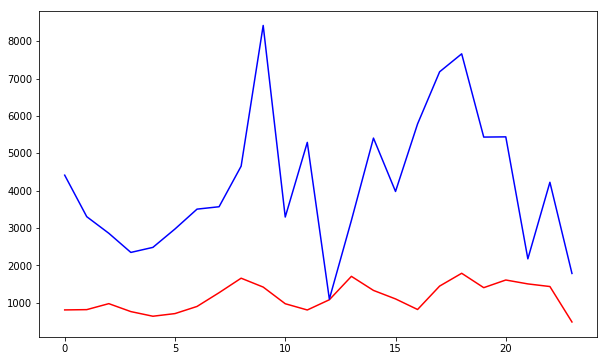

In [66]:
### Household demand curve for the considered day

hh_load_1 = pd.DataFrame((household_load_var[3][col]+1)*household_size[3])
day_hh_1 = pd.DataFrame(hh_load_1.values*household_load_day.values, columns=hh_load_1.columns, index=hh_load_1.index)
hh_load_2 = pd.DataFrame((household_load_var[4][col]+1)*household_size[4])
day_hh_2 = pd.DataFrame(hh_load_2.values*household_load_day.values, columns=hh_load_2.columns, index=hh_load_2.index)

plt.figure(1, figsize=(10, 6))
plt.plot(day_hh_1 ,'r')
plt.plot(day_hh_2,'b')
plt.show()


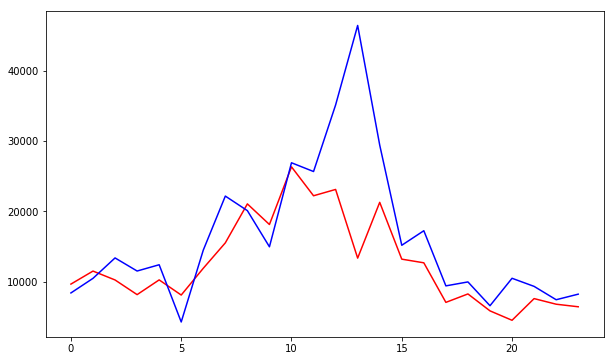

558

In [67]:
### Office demand curve for the considered day

off_load_1 = pd.DataFrame(office_load_v3[1][col])
day_oh_1 = pd.DataFrame(off_load_1.values*household_load_day.values, columns=off_load_1.columns, index=off_load_1.index)
off_load_2 = pd.DataFrame(office_load_v3[2][col])
day_oh_2 = pd.DataFrame(off_load_2.values*household_load_day.values, columns=off_load_2.columns, index=off_load_2.index)

plt.figure(1, figsize=(10, 6))
plt.plot(day_oh_1 ,'r')
plt.plot(day_oh_2,'b')
plt.show()
office_size[2]

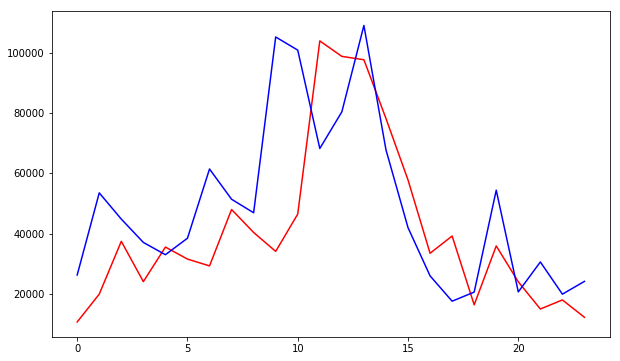

In [68]:
### School demand curve for the considered day

edu_load_1 = pd.DataFrame(education_load_v3[5][col])
day_eh_1 = pd.DataFrame(edu_load_1.values*household_load_day.values, columns=edu_load_1.columns, index=edu_load_1.index)
edu_load_2 = pd.DataFrame(education_load_v3[2][col])
day_eh_2 = pd.DataFrame(edu_load_2.values*household_load_day.values, columns=edu_load_2.columns, index=edu_load_2.index)

plt.figure(1, figsize=(10, 6))
plt.plot(day_eh_1 ,'r')
plt.plot(day_eh_2,'b')
plt.show()


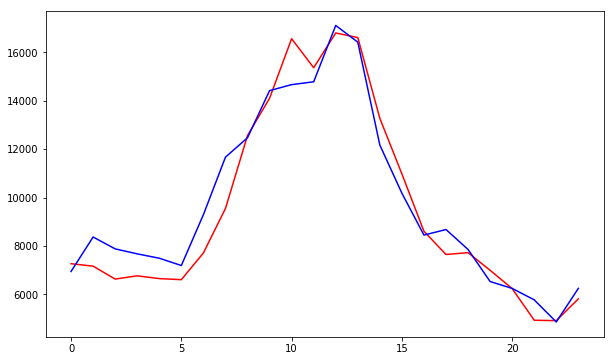

In [69]:
### Hospital demand curve for the considered day
hos_load_1 = pd.DataFrame(hospital_load_v3[1][col])
day_hosh_1 = pd.DataFrame(hos_load_1.values*household_load_day.values, columns=hos_load_1.columns, index=hos_load_1.index)
hos_load_2 = pd.DataFrame(hospital_load_v3[2][col])
day_hosh_2 = pd.DataFrame(hos_load_2.values*household_load_day.values, columns=hos_load_2.columns, index=edu_load_2.index)

plt.figure(1, figsize=(10, 6))
plt.plot(day_hosh_1 ,'r')
plt.plot(day_hosh_2,'b')
plt.show()

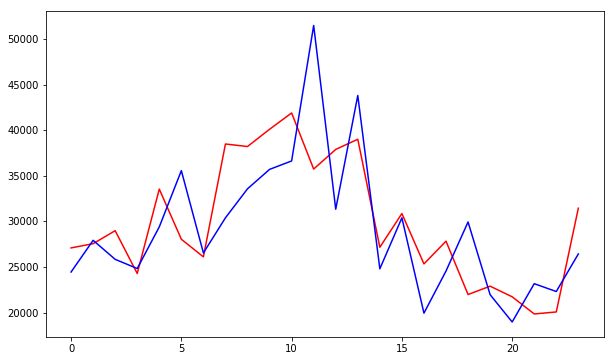

In [70]:
### Hotel/Restaurant demand curve for the considered day
hot_load_1 = pd.DataFrame(hotel_load_v3[1][col])
day_hoth_1 = pd.DataFrame(hot_load_1.values*household_load_day.values, columns=hot_load_1.columns, index=hot_load_1.index)
hot_load_2 = pd.DataFrame(hotel_load_v3[2][col])
day_hoth_2 = pd.DataFrame(hot_load_2.values*household_load_day.values, columns=hot_load_2.columns, index=hot_load_2.index)

plt.figure(1, figsize=(10, 6))
plt.plot(day_hoth_1 ,'r')
plt.plot(day_hoth_2,'b')
plt.show()

In [71]:
####################### Load Profils Generation END #############################
#################################################################################
### Give every spotload node a load profil. The loads are not assined towards the correct nodes/busses,
### since it is unknow yet, what kind of building is connected to which node/bus

hh_v_hour = pd.DataFrame(hh_v_hour)
off_load_hour = pd.DataFrame(off_load_hour)
edu_load_hour = pd.DataFrame(edu_load_hour)
hos_load_hour = pd.DataFrame(hos_load_hour)
hot_load_hour = pd.DataFrame(hot_load_hour)

load_list = pd.concat([hh_v_hour, off_load_hour, hos_load_hour, hot_load_hour, edu_load_hour], ignore_index = True)
load_list = load_list.rename(columns={0:'demand_kW'})

load_list['demand_kW'] = load_list['demand_kW'].astype(float)
load_list = load_list['demand_kW'] * household_load_pm_hour['Current']
load_list = pd.DataFrame(load_list)

In [72]:
section_spotload_demand = section_spotload.merge(load_list, left_index=True, right_index=True)
section_spotload_demand

,index,SectionID,FromNodeID,ToNodeID,demand_kW
0,6,42783662-SPOTLOAD,42783662,42783662-SPOTLOAD,5917.206720
1,11,42787380-SPOTLOAD,42787380,42787380-SPOTLOAD,1552.739478
2,15,42769314-SPOTLOAD,42769314,42769314-SPOTLOAD,10866.612539
3,21,42777729-SPOTLOAD,42777729,42777729-SPOTLOAD,1126.087468
4,48,42783479-SPOTLOAD,42783479,42783479-SPOTLOAD,4571.590077
5,52,42785340-SPOTLOAD,42785340,42785340-SPOTLOAD,1398.213758
6,56,42793224-SPOTLOAD,42793224,42793224-SPOTLOAD,7343.482786
7,58,42767154-SPOTLOAD,42767154,42767154-SPOTLOAD,4625.735455
8,84,152492633-SPOTLOAD,152492633,152492633-SPOTLOAD,296.624574
9,163,42937051-SPOTLOAD,42937051,42937051-SPOTLOAD,4907.508734


In [73]:
for _, load in section_spotload_demand.iterrows():
    bus_idx = pp.get_element_index(net, "bus", load.FromNodeID)
    phi = math.acos(95/100)
    pp.create_load(net, bus_idx, p_kw = load.demand_kW/1000, q_kvar = (math.tan(phi)*load.demand_kW)/1000 , const_z_percent=0, const_i_percent=0, 
                   name = "load "+ load.FromNodeID, scaling=1., in_service=True)
bus_idx

1260

In [74]:
net.load

,name,bus,p_kw,q_kvar,const_z_percent,const_i_percent,sn_kva,scaling,in_service,type
0,load 42783662,1467,5.917207,1.944892,0.0,0.0,NaN,1.0,True,None
1,load 42787380,890,1.552739,0.510361,0.0,0.0,NaN,1.0,True,None
2,load 42769314,1758,10.866613,3.571683,0.0,0.0,NaN,1.0,True,None
3,load 42777729,781,1.126087,0.370127,0.0,0.0,NaN,1.0,True,None
4,load 42783479,1499,4.571590,1.502609,0.0,0.0,NaN,1.0,True,None
5,load 42785340,818,1.398214,0.459571,0.0,0.0,NaN,1.0,True,None
6,load 42793224,1016,7.343483,2.413686,0.0,0.0,NaN,1.0,True,None
7,load 42767154,1646,4.625735,1.520406,0.0,0.0,NaN,1.0,True,None
8,load 152492633,448,0.296625,0.097496,0.0,0.0,NaN,1.0,True,None
9,load 42937051,257,4.907509,1.613020,0.0,0.0,NaN,1.0,True,None


In [75]:
solar_data_file = os.path.join('network_data/Timeseries_46.464_6.843_CM__1kWp_crystSi_14_37deg_-5deg_2016_2016.csv')

data_solar = pd.read_csv(solar_data_file, skiprows=10, skipfooter=12, engine='python')
data_solar.set_index(pd.to_datetime(data_solar["Date"], format="%Y%m%d:%H%M")+ pd.Timedelta(minutes=5), inplace=True)
data_solar = data_solar.drop('Date', 1)

radiation = data_solar.loc[date_time].EPV / 1000
radiation

0.60474000000000006

In [76]:
## Photovoltaics

section_pv['FromNodeID'].drop_duplicates()

pv_gen = pd.read_csv('network_data/pv_generator.csv', sep=',', header=0, decimal=',')
pv_gen['DeviceNumber'] = pv_gen['DeviceNumber'].apply(lambda x: x.split('-')[0])
pv_gen[["ActiveGeneration", "PowerFactor"]] = pv_gen[["ActiveGeneration", "PowerFactor"]].astype(float)
pv_gen = pv_gen[pv_gen['LoadModelName'] == 'MOYENNE']
pv_gen['ProducedActGen'] = pv_gen['ActiveGeneration']* radiation
pv_gen = pv_gen.drop_duplicates().reset_index(drop=True)

pv_gen

,DeviceNumber,DeviceType,LoadModelName,ActiveGeneration,PowerFactor,ProducedActGen
0,42778481,45,MOYENNE,12.81238,100.0,7.748159
1,42816058,45,MOYENNE,10.98204,100.0,6.641279
2,42819953,45,MOYENNE,7.32136,100.0,4.427519
3,42819954,45,MOYENNE,7.32136,100.0,4.427519
4,78874605,45,MOYENNE,10.98204,100.0,6.641279
5,42783662,45,MOYENNE,5.49102,100.0,3.320639
6,42783436,45,MOYENNE,3.66068,100.0,2.213760
7,42762511,45,MOYENNE,5.49102,100.0,3.320639
8,42787380,45,MOYENNE,7.32136,100.0,4.427519
9,42819955,45,MOYENNE,7.32136,100.0,4.427519


In [77]:
### Photovoltaics production of considered day, only needed for picture /curve

radiation_day = pd.DataFrame(data_solar.loc[date_start:date_end].EPV / 1000).reset_index(drop=True)
radiation_day = radiation_day['EPV'].astype(float)
ActGen_day = pd.DataFrame(pv_gen['ActiveGeneration'].astype(float)).reset_index(drop=True)

#pv_gen_day = ActGen_day['ActiveGeneration'].loc[1]
#ActGen_day.loc[1]
#pv_gen_day = [[0 for x in range(14)] for h in range(24)] # 14 pv systems and 24 hour
pv_gen_day = []

for i in range(14):
    pv_gen_day_v0 = []
    pv_gen_day_v0 =  radiation_day*ActGen_day['ActiveGeneration'].loc[i]
    pv_gen_day.append(pv_gen_day_v0)
pv_gen_day[13]

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.022074
6     0.305301
7     0.916488
8     1.661839
9     2.198495
10    2.535533
11    2.720141
12    2.735114
13    2.567088
14    2.213760
15    1.683583
16    1.015912
17    0.335282
18    0.067832
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: EPV, dtype: float64

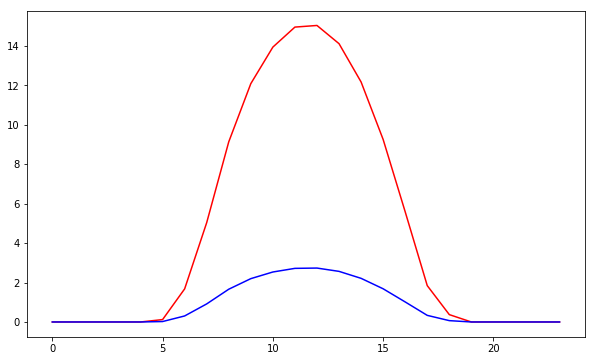

In [78]:
plt.figure(1, figsize=(10, 6))
plt.plot(pv_gen_day[11] ,'r')
plt.plot(pv_gen_day[13],'b')
plt.show()

In [79]:
# creating the pv table

for _,row in pv_gen.iterrows():
    phi = math.acos(row.PowerFactor/100)
    pp.create_sgen(net, pp.get_element_index(net, "bus", row.DeviceNumber), p_kw=-row.ProducedActGen,
                   q_kvar=(-1)*math.tan(phi)*row.ProducedActGen,sn_kva=row.ActiveGeneration, type='PV', name=row.DeviceNumber)

# show static generator table
#pv_gen
net.sgen

,name,bus,p_kw,q_kvar,sn_kva,scaling,in_service,type
0,42778481,1525,-7.748159,-0.0,12.81238,1.0,True,PV
1,42816058,1458,-6.641279,-0.0,10.98204,1.0,True,PV
2,42819953,767,-4.427519,-0.0,7.32136,1.0,True,PV
3,42819954,691,-4.427519,-0.0,7.32136,1.0,True,PV
4,78874605,741,-6.641279,-0.0,10.98204,1.0,True,PV
5,42783662,1467,-3.320639,-0.0,5.49102,1.0,True,PV
6,42783436,1131,-2.213760,-0.0,3.66068,1.0,True,PV
7,42762511,699,-3.320639,-0.0,5.49102,1.0,True,PV
8,42787380,890,-4.427519,-0.0,7.32136,1.0,True,PV
9,42819955,972,-4.427519,-0.0,7.32136,1.0,True,PV


In [80]:
pp.create_ext_grid(net, pp.get_element_index(net, "bus", '42879302'), vm_pu=1.03, va_degree=0, name='External grid',
                   s_sc_max_mva=10000, rx_max=0.1, rx_min=0.1) 


0

In [81]:
net.ext_grid # show external grid table

,name,bus,vm_pu,va_degree,in_service,s_sc_max_mva,rx_min,rx_max
0,External grid,283,1.03,0.0,True,10000.0,0.1,0.1


In [82]:
pp.runpp(net, max_iteration=10000)

In [83]:
lines = net.line.rename(columns={'name':'SectionID'})
lines

,SectionID,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,max_i_ka,df,parallel,type,in_service
0,43939209,None,890,1529,0.007,1.4662,0.0900,0.023150,0.110,1.0,1,cs,True
1,43825065,None,1584,1529,0.011,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True
2,43824920,None,1204,1529,0.011,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True
3,43825506,None,1040,1746,0.018,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True
4,43896292,None,2509,1746,0.006,0.2238,0.0820,0.004504,0.255,1.0,1,cs,True
5,43971553,None,1530,1107,0.238,0.2633,0.0780,0.013818,0.319,1.0,1,cs,True
6,43971551,None,2238,1107,0.013,0.2633,0.0780,0.013818,0.319,1.0,1,cs,True
7,94588448,None,1885,1696,0.034,0.2450,0.0710,3.183099,0.281,1.0,1,cs,True
8,43895417,None,2513,827,0.003,0.2238,0.0820,0.004504,0.255,1.0,1,cs,True
9,43886508,None,656,827,0.053,0.2238,0.0860,0.009009,0.220,1.0,1,cs,True


In [84]:
cable_node = cable_section_coord[['SectionID','FromNodeID','ToNodeID']]
line_info = []
line_info = lines.merge(net.line_geodata, left_index=True, right_index=True)
line_info_v2 = pd.merge(line_info, cable_node, on='SectionID', how='inner')
#line_info_v2.to_csv(r'result_data/net_line_v2.csv',header=True, index=True, mode='a')
line_info_v2
#cable_node

,SectionID,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,max_i_ka,df,parallel,type,in_service,coords,FromNodeID,ToNodeID
0,43939209,None,890,1529,0.007,1.4662,0.0900,0.023150,0.110,1.0,1,cs,True,"[(554020.475, 146396.927), (554025.194, 146400...",42787380,42687308
1,43825065,None,1584,1529,0.011,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True,"[(554018.517, 146409.068), (554025.194, 146400...",42660293,42687308
2,43824920,None,1204,1529,0.011,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True,"[(554031.871, 146392.063), (554025.194, 146400...",42700105,42687308
3,43825506,None,1040,1746,0.018,0.4476,0.0900,0.011258,0.150,1.0,1,cs,True,"[(554007.887, 146422.604), (554003.163, 146428...",42698357,42684664
4,43896292,None,2509,1746,0.006,0.2238,0.0820,0.004504,0.255,1.0,1,cs,True,"[(553992.0, 146424.0), (554003.163, 146428.620...",52889610,42684664
5,43971553,None,1530,1107,0.238,0.2633,0.0780,0.013818,0.319,1.0,1,cs,True,"[(554016.16, 146347.766), (553866.93, 146402.2...",42703621,42694044
6,43971551,None,2238,1107,0.013,0.2633,0.0780,0.013818,0.319,1.0,1,cs,True,"[(553864.373767, 146409.474934), (553866.93, 1...",52101382,42694044
7,94588448,None,1885,1696,0.034,0.2450,0.0710,3.183099,0.281,1.0,1,cs,True,"[(554109.3811090001, 146311.74646199998), (554...",52857530,94588294
8,43895417,None,2513,827,0.003,0.2238,0.0820,0.004504,0.255,1.0,1,cs,True,"[(553992.0, 146424.0), (554003.818, 146421.31)]",52889602,42697592
9,43886508,None,656,827,0.053,0.2238,0.0860,0.009009,0.220,1.0,1,cs,True,"[(554025.1070000001, 146394.201), (554003.818,...",42686073,42697592


In [85]:
bus_info = []
bus_info = net.bus.merge(net.bus_geodata, left_index=True, right_index=True)
#bus_info.to_csv(r'result_data/net_bus.csv', header=True, index=True, mode='a')

In [86]:
net.line_geodata.index.name  = 'index'
geodata = net.line_geodata
geodata.index = geodata.index.astype(str)
#net.line_geodata.to_dict('index')
geodata.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2220', '2221', '2222', '2223', '2224', '2225', '2226', '2227', '2228',
       '2229'],
      dtype='object', name='index', length=2230)

In [87]:
#dict_to_save = geodata.to_dict('index')
#dict_to_save
#with open('result_data/line_geodata.json', 'w') as fp:
#    json.dump(dict_to_save, fp)

In [103]:
#net.switch.to_csv(r'result_data/net_switch.csv', header=True, index=True, mode='a')
switch_data = net.switch.rename(columns={'name':'SectionID'})
frames = [cable_section_zero_length, cable_section_low_imp]
switch_cable = pd.concat(frames)
switch_cable
switch_data_v2 = pd.merge(switch_data, switch_cable, on='SectionID', how='inner')
switch_data_v2.to_csv(r'result_data/net_switch_v2.csv', header=True, index=True, mode='a')

In [120]:
trafo_info = net.trafo.rename(columns={'name':'SectionID'}) 
transformer_merge = transformer[['FromNodeID','ToNodeID']]
transformer_data = trafo_info.merge(transformer_merge, left_index=True, right_index=True)
transformer_data.to_csv(r'result_data/net_trafo_v2.csv', header=True, index=True, mode='a')
list(transformer_data)

['SectionID',
 'std_type',
 'hv_bus',
 'lv_bus',
 'sn_kva',
 'vn_hv_kv',
 'vn_lv_kv',
 'vsc_percent',
 'vscr_percent',
 'pfe_kw',
 'i0_percent',
 'shift_degree',
 'tp_side',
 'tp_mid',
 'tp_min',
 'tp_max',
 'tp_st_percent',
 'tp_st_degree',
 'tp_pos',
 'parallel',
 'df',
 'in_service',
 'FromNodeID',
 'ToNodeID']

In [121]:
section_spotload
#load_data = net.load.merge(section_spotload, left_index=True, right_index=True)
#load_data
#load_data.to_csv(r'result_data/net_load_v2.csv', header=True, index=True, mode='a')


,index,SectionID,FromNodeID,ToNodeID
0,6,42783662-SPOTLOAD,42783662,42783662-SPOTLOAD
1,11,42787380-SPOTLOAD,42787380,42787380-SPOTLOAD
2,15,42769314-SPOTLOAD,42769314,42769314-SPOTLOAD
3,21,42777729-SPOTLOAD,42777729,42777729-SPOTLOAD
4,48,42783479-SPOTLOAD,42783479,42783479-SPOTLOAD
5,52,42785340-SPOTLOAD,42785340,42785340-SPOTLOAD
6,56,42793224-SPOTLOAD,42793224,42793224-SPOTLOAD
7,58,42767154-SPOTLOAD,42767154,42767154-SPOTLOAD
8,84,152492633-SPOTLOAD,152492633,152492633-SPOTLOAD
9,163,42937051-SPOTLOAD,42937051,42937051-SPOTLOAD


In [117]:
pv_gen
pv_data = net.sgen.merge(pv_gen, left_index=True, right_index=True)
pv_data.to_csv(r'result_data/net_sgen_v2.csv', header=True, index=True, mode='a')


In [ ]:
#net.ext_grid.to_csv(r'result_data/net_ext_grid.csv', header=True, index=True, mode='a')


In [ ]:
net.res_load

In [ ]:
net.res_sgen

In [ ]:
net.res_bus
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(net.res_bus)

In [ ]:
net.res_line

In [ ]:
from pandapower.plotting.plotly import simple_plotly

plot.simple_plot(net, bus_size=0.7, respect_switches = True) # , on_map=True, projection='epsg:'


In [ ]:
cmap_list=[(20, "green"), (50, "yellow"), (60, "red")]
cmap, norm = plot.cmap_continous(cmap_list)
lc = plot.create_line_collection(net, net.line.index, zorder=1, cmap=cmap, norm=norm, linewidths=5)

cmap_list=[(0, "blue"), (1.0, "green"), (1.1, "red")]
cmap, norm = plot.cmap_continous(cmap_list)
bc = plot.create_bus_collection(net, net.bus.index, size=5, zorder=2, cmap=cmap, norm=norm)

loadc = plot.create_bus_collection(net, net.load.index, size=5, zorder=2, norm=norm)
pvc = plot.create_bus_collection(net, net.sgen.index, size=5, zorder=1, norm=norm)

plot.draw_collections([lc, bc, loadc, pvc], figsize=(18,10))
